In [1]:
# Student Name: David de Andres Hernandez
# Matriculation Number: 3755457

# Discrete Event Simulator (DES) - Part 5

# Verification

In [2]:
import part5_simstudy as p5
import warnings
warnings.filterwarnings('ignore')

### Task 5.2.1: Multiple Runs Confidence
Implement simulation routine, that runs fixed time simulations until the width of the confidence interval is small enough. For this, call your simulation like in the previous tasks with a simulation time of 100 s and 1000 s repectively. After each run, extract the blocking probability and add it to a TIC. Calculate the width of the confidence interval and stop your simulations when it is below two times ε. Use ρ = 0.9 and S=4 and calculate the number of runs for a confidence level of 0.9 and 0.95.

In [3]:
p5.task_5_2_1()

SIM TIME:  100s; ALPHA: 10%; NUMBER OF RUNS: 4238; TOTAL SIMULATION TIME (SECONDS): 423800; BLOCKING PROB.: 0.11581830084936205
SIM TIME:  100s; ALPHA:  5%; NUMBER OF RUNS: 6009; TOTAL SIMULATION TIME (SECONDS): 600900; BLOCKING PROB.: 0.11461526394639868
SIM TIME: 1000s; ALPHA: 10%; NUMBER OF RUNS:  468; TOTAL SIMULATION TIME (SECONDS): 468000; BLOCKING PROB.: 0.12652185477120595
SIM TIME: 1000s; ALPHA:  5%; NUMBER OF RUNS:  660; TOTAL SIMULATION TIME (SECONDS): 660000; BLOCKING PROB.: 0.12558699402109189


[4238, 6009, 468, 660]

### Task 5.2.2: Batch Confidence
Implement simulation routine, that runs fixed time simulations until the width of the confidence interval is small enough. For this, call your simulation like in the previous tasks with a simulation time of 100 s and 1000 s repectively. After each run, extract the blocking probability and add it to a TIC. Calculate the width of the confidence interval and stop your simulations when it is below two times ε. Use ρ = 0.9 and S=4 and calculate the number of runs for a confidence level of 0.9 and 0.95.


In [4]:
p5.task_5_2_2()

BATCH SIZE:  100; ALPHA: 10%; NUMBER OF BATCHES:3875; TOTAL SIMULATION TIME (SECONDS): 447331.27; BLOCKING PROB: 0.12099794172056899
BATCH SIZE:  100; ALPHA:  5%; NUMBER OF BATCHES:5499; TOTAL SIMULATION TIME (SECONDS): 635867.05; BLOCKING PROB: 0.1214672052812792
BATCH SIZE: 1000; ALPHA: 10%; NUMBER OF BATCHES:449; TOTAL SIMULATION TIME (SECONDS): 514338.86; BLOCKING PROB: 0.12568921485166737
BATCH SIZE: 1000; ALPHA:  5%; NUMBER OF BATCHES:631; TOTAL SIMULATION TIME (SECONDS): 723459.55; BLOCKING PROB: 0.12547003501777287


[447331271.85857254, 635867053.2800833, 514338863.46578556, 723459549.08141]


### Task 5.2.4: Confidence Plots II
Make the following simulation study. Use an M/M/1/∞ system and perform multiple runs simulation. Make your study for system offered traffic 0.5 and 0.9. Use confidence levels of 0.9 and 0.95. Use 100 s and 1000 s as simulation time. Calculate the confidence interval for the system throughput of 30 runs. Repeat this 100 times. Take each confidence interval and plot it with your implemented function (see task 5.2.3). On the x-axis you should have values from 1 to 100 (for every repetition, each of 30 runs) and on the y-axis the given calculated mean value with the error bars. Also plot the theoretical value as a dashed line.

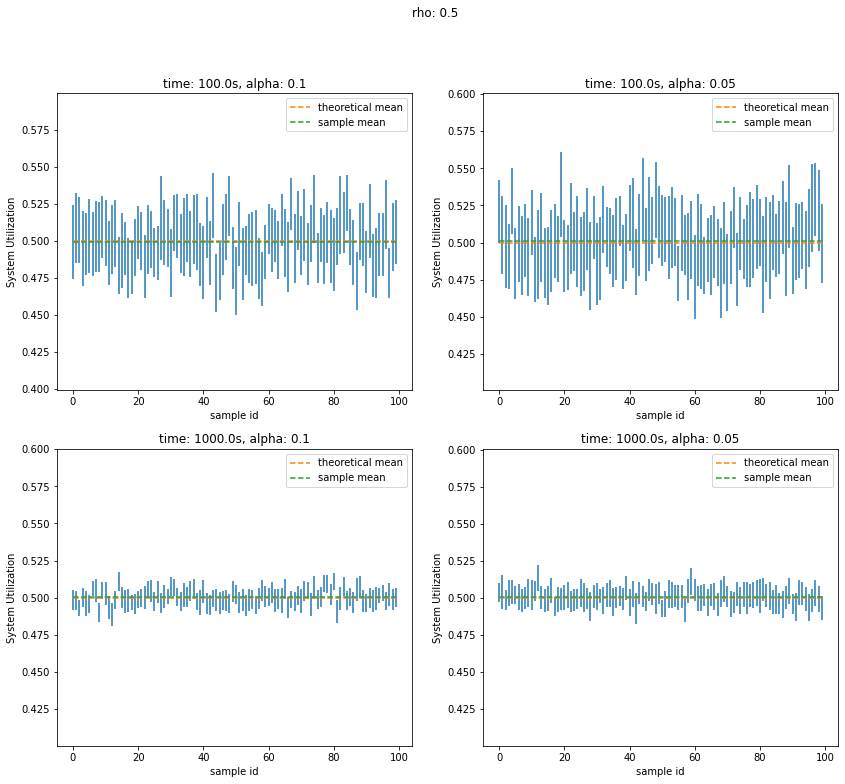

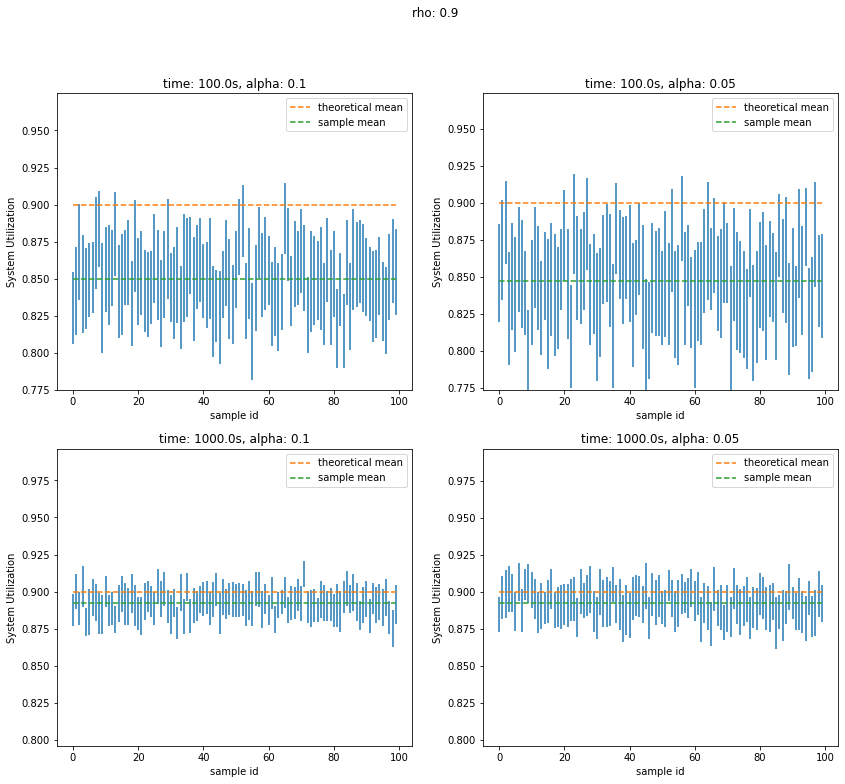

In [5]:
p5.task_5_2_4()

#  Analysis and General Questions

### Task 5.3.1: Confidence Interval Width
*How many runs do you need in each setup of tasks 5.2.1 and 5.2.2? Compare all eight values and explain, why they differ and which are the advantages of the setups.*

In the case of 5.2.1 the results are $[4238, 6009, 468, 660]$ runs for each parameters' combination. On the one hand, for achieving 90% and 95% confidence using 100s simulations, we need 4238 and 6009 runs respectively. Approximately, 30% more runs are required to increase the confidence from 90% to 95%. On the other hand, using 1000s simulation, we need 468 and 660 runs for each confidence level.  Although running simulations of 1000s seems initially advantageous, if we compute the total simulation time we get $[423800, 600900, 468000, 660000]$ seconds. These numbers shows that the 100s increments are more granular and allows us to achieve the desired confidence in less time.

In the case of 5.2.2 the results are $[3875, 5499, 449, 631]$ batches for each parameters' combination. Again, a 30% approximately is required to increase the confidence from 90% to 95%. Furthermore, if we compute again the total simulated time: $[447331.27, 447331.27, 514338.86, 514338.86]$ in seconds we observe the same effect. The 100 packets batches allows us to approach the desired width more granularly and thus, stop the simulation effort before.

If we look at the simulation time required for the 95% confidence, we see that the effect of the bias produced by the warm-up phase makes the first method require more simulation time than the second. Therefore, with higher confidence level it is advisable to reduce the possible bias produced by the warm-up.

In conclusion, to decide which method to use, we need to consider both the  warm-up time of our experiment and the pursued confidence level.

### Task 5.3.2: Confidence Interval Width
Compared to the actual blocking probability calculated by an analytic formula
$$
P(S) = \frac{(1−\rho)\rho^{S+1}}{1-\rho^{S+2}}
$$
the blocking probability in task 5.2.1 always differs. Why is this the case and does it differ in task 5.2.2 as well?

In [6]:
print(f'The blocking probability calculated with the analytical formula is: {p5.analytic_bp(rho=0.9,S=4)}')

The blocking probability calculated with the analytical formula is: 0.1260225499883686


In my results, the 100s simulations from method 5.2.1 under-estimate the analytical value. This is because of the influence of the warm-up time. Under 1000s it seems already to have little influence and the value approximates up to a 0.001 delta, the analytical value. When using the batch method (5.2.2), we already observe higher precision in all the 4 calculations due to the reduced influence of the warm-up phase (once, per configuration).

### Task 5.3.3: Confidence Interval Width
What can you observe in the plots of task 5.2.4? What are the differences between the plots? How many intervals are covering the true value and how many not? How does the skewness affect the calculation of confidence intervals?


When $\rho=0.9$ the sample mean deviates 0.05 from the true mean if the simulation time is 100s. The gap decreases when simulating longer due to the law of large numbers. This gap is significantly smaller in the $\rho=0.5$ simulation.

Regarding the confidence intervals, we observe under both values of $\rho$ that longer simulation times produce narrower confidence intervals which indicates that the estimation procedure is more stable. Furthermore, in the 90% confidence level we should observe that 90% of the calculated intervals contain the sample mean. For example, from the $\rho=0.9$ plots we can count 12 intervals in the 100s simulation and 10 intervals in the 1000s simulation that do not include the sample mean. If more confidence intervals were calculated, the % of intervals not including the sample mean would approximate more to the expected value (10%).
In the 95% confidence level, 95% of the calculated intervals contain the sample mean. For example, from the $\rho=0.5$ plots we can count 10 intervals in the 100s simulation and 9 intervals in the 1000s simulation that do not include the sample mean. Again, if more confidence intervals were calculated, the % of intervals not including the sample mean would approximate more to the expected value (5%).


The skewness provides information about the asymmetry of a pdf about its mean. As well described [here](https://garstats.wordpress.com/2019/07/11/ttestcov/) *"CI coverage is not at the expected, nominal level, for instance when the model expects symmetric distributions and we’re actually sampling from skewed populations (which is the norm, not the exception, when we measure sizes, durations, latencies etc.)"*. We have indeed observed that in the above experiment, the CI coverage was above or below the expected value. If the skewness was 0, we should observe the same number of CI not covering at both sides of the mean. In consequence, when observing skewness, it might be benefitial to trim the data to reduce the influence of the pdf's tails.

### Task 5.3.4: Variable Simulation Time
Would it also be an option to do a simulation with an infinite simulation time (and stop as soon as a given confidence level is reached) and take the samples for the blocking probability each time a packet is dropped? Justify your answer!

I don't believe this would yield good results as the samples would be correlated. The blocking probability at time t would be highly influenced by the probability at time t-1. For this reason we perform batches and we reset the counters required to compute the blocking probability at the beginning of every batch.

### Task 5.3.5: Bootstrapping
What’s the advantage of bootstrap confidence interval over normal confidence interval? Under which case would the two types of confidence interval become the same?

The bootstrap technique allows us to generate additional samples when the probability distribution is unknown, and we have at least one sample. Bootstrapping is advantageous under skewed populations, as the normal CI are influenced by the skewness. In the case that the skew is 0 and the sample data for the bootstrapping is symmetric, the confidence intervals will be the same.